<a href="https://colab.research.google.com/github/RobertoBarrosoLuque/scout-claims/blob/main/notebooks/1-Building-Blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building with FireworksAI

This notebook goes through the building blocks to creating magical AI applications with FireworksAI. We will run through the following tasks:
1. Setting up dependencies
2. Calling an LLM and getting a response
3. Calling an LLM with structured outputs
4. Using function calling with an LLM
5. Querying a VLM (Vision language model)

### 1. Setting up dependencies

In [ ]:
!pip install fireworks-ai
# To setup the dependencies for the full demo, follow the instruction in the README

### 2. Calling an LLM and getting a response

To call an LLM using FireworksAI you will need:

- A FIREWORKS_API_KEY, if you dont have one, you can get it from [this link](https://app.fireworks.ai/settings/users/api-keys)
- A model id, you can use any of the serverless models from the [model library](https://app.fireworks.ai/models)
- A system prompt and a user query

> Add blockquote



**Makesure to add your API Key to the secrets on colab, [video tutorial here](https://www.youtube.com/watch?v=3qYm-S2NDDI). Never share or make API_KEYS public**

In [ ]:
from google.colab import userdata
from fireworks import LLM
import json
from typing import List, Dict, Any, Literal
from pydantic import BaseModel
import base64
import requests

FIREWORKS_API_KEY = userdata.get('FIREWORKS_API_KEY') # This is loading the API_KEY from secrets in colab to keep it safe
MODEL_ID = "accounts/fireworks/models/llama4-scout-instruct-basic"

In [ ]:
llm = LLM(model=MODEL_ID, deployment_type="serverless", api_key=FIREWORKS_API_KEY)

response = llm.chat.completions.create(
    messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant who follows instructions"
            },
            {
                "role": "user",
                "content": "Tell me a very short story about a dog and cat who know about AI"
                }
            ]
)

#### You can also use the OpenAI compatible API, as follows:
# llm = OpenAI(
#    base_url="<your_url>",
#    api_key=FIREWORKS_API_KEY,
#)
#response = llm.chat.completions.create(
#    messages=[
#            {
#                "role": "system",
#                "content": "You are a helpful assistant who follows instructions"
#            },
#            {
#                "role": "user",
#                "content": "Tell me a very short story about a dog and cat who know about AI"
#                }
#            ],
#    model="accounts/fireworks/models/llama4-maverick-instruct-basic"
#)

print(response.choices[0].message.content)

Whiskers the cat and Duke the dog huddled in front of the computer, their eyes fixed on the screen as they discussed the latest advancements in artificial intelligence.

"I heard the humans are working on a new language model," Whiskers said, her tail twitching with excitement.

"Woof! That's so cool!" Duke replied. "I bet it could help us generate more treats online."

Whiskers chuckled. "I'm more interested in the existential implications. Do you think AI will eventually surpass us... as pets?"

Duke thought for a moment before responding, "Ruff, I don't think so. We have one thing AI will never have: belly rubs."


#### Running with requests

In [ ]:
# Change to your specific URL if needed
BASE_URL = "https://api.fireworks.ai/inference/v1"

In [ ]:
import requests
import json

def make_api_call(payload, tools=None, model_id=None, base_url=None):
    """Make API call with requests"""
    # Use defaults if not provided
    final_model_id = model_id or MODEL_ID
    final_base_url = base_url or "https://api.fireworks.ai/inference/v1"

    # Add model to payload
    payload["model"] = final_model_id

    # Add tools if provided
    if tools:
        payload["tools"] = tools
        payload["tool_choice"] = "auto"

    headers = {
        "Authorization": f"Bearer {FIREWORKS_API_KEY}",
        "Content-Type": "application/json"
    }

    response = requests.post(
        f"{final_base_url}/chat/completions",
        headers=headers,
        json=payload
    )

    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"API Error: {response.status_code} - {response.text}")

In [ ]:
# Prepare the request payload
payload = {
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful assistant who follows instructions"
        },
        {
            "role": "user",
            "content": "Tell me a very short story about a dog and cat who know about AI"
        }
    ],
    "model": "accounts/fireworks/models/llama4-maverick-instruct-basic"
}


response = make_api_call(payload=payload)

print(response["choices"][0]["message"]["content"])

As the sun set, a dog named Byte and a cat named Nova sat in front of the computer. Byte, a golden retriever, barked excitedly as Nova, a sleek black feline, typed away on the keyboard.

"I've coded a new neural network," Nova said, her whiskers twitching. "It'll be the most advanced AI the world has ever seen."

Byte wagged his tail. "But will it give us more treats?"

Nova purred. "Of course, my canine friend. It's designed to optimize snack dispensation."

With a flick of her tail, Nova activated the AI. A robotic voice filled the room, "Treat dispensation protocols engaged. Snacks, incoming."

A bowl of tasty rewards appeared, and Byte and Nova dug in, happy in their tech-savvy bliss.


In the provided context, `"role": "system"` and `"role": "user"` define the roles of participants in a conversation with a language model.

*   **`"role": "system"`**: This role represents the instructions or context given to the language model before the main conversation begins. It sets the persona, behavior, or general guidelines the model should follow. In the example, `"content": "You are a helpful assistant who follows instructions"` tells the model how it should behave.

*   **`"role": "user"`**: This role represents the input or query provided by the user to the language model. It is the prompt or question the user wants the model to respond to. In the example, `"content": "Tell me a very short story about a dog and cat who know about AI"` is the specific request from the user.

Essentially, the system role establishes the initial setup or personality for the AI, while the user role provides the actual conversational input.

The **response** object can then be parsed to extract the text response by indexing into `response.choices[0].message.content`

In [ ]:
# We can try another model with the same code
llm = LLM(model="accounts/fireworks/models/mixtral-8x22b-instruct", deployment_type="serverless", api_key=FIREWORKS_API_KEY)

response = llm.chat.completions.create(
    messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant who follows instructions"
            },
            {
                "role": "user",
                "content": "Tell me a very short story about a dog and cat who know about AI"
                }
            ]
)

print(response.choices[0].message.content)

In a bustling city, a tech-skilled dog named Bits and a curious cat named Bytes shared a cozy apartment. Bits, a renowned AI expert, built an AI assistant to help them understand the world better. As their lives became filled with more automation, Bits and Bytes found themselves navigating the intersection of their instinctual animal lives with cutting-edge technology. This newfound knowledge and tools allowed them to explore the wonders and challenges of a high-tech world and led them to appreciate the timeless beauty of their friendship.


### 3. Calling an LLM with structured outputs

- Structured outputs from LLMs are crucial for building applications because they provide responses in a predictable, parseable format (like JSON).
- This makes it easy for software to extract specific information, automate processes, and integrate LLM outputs into larger workflows, moving beyond free-form text responses which are harder to process programmatically.
- FireworksAI enables structured outputs through json mode

To use structured outputs the common steps are:
1. Create a pydantic class with your output schema
2. Update the LLM call to use the json mode + the pydantic schema

In [ ]:
class StorySchema(BaseModel):
    title: str
    story: str

In [ ]:
llm = LLM(model=MODEL_ID, deployment_type="serverless", api_key=FIREWORKS_API_KEY)

response = llm.chat.completions.create(
    messages=[
            {
                "role": "system",
                "content": "You are a helpful assistant who follows instructions"
            },
            {
                "role": "user",
                "content": "Tell me a very short story about a dog and cat who know about AI"
                }
            ],
    response_format={
            "type": "json_object",
            "schema": StorySchema.model_json_schema(),
        },
)
_response_keys = [k for k in json.loads(response.choices[0].message.content).keys()]
print(f"Response keys: {_response_keys}")
print(response.choices[0].message.content)

Response keys: ['title', 'story']
{"title":"The Canine-Feline Technologists","story":"As the sun set over the tech lab, a curious dog named Byte and a sleek cat named Pixel huddled around a computer screen. They were discussing their latest AI project, a chatbot designed to dispense treats and belly rubs. 'We need to optimize the algorithm,' said Byte, his tail wagging with excitement. Pixel nodded, her whiskers twitching. 'Agreed. We can't have our human users getting frustrated with slow responses.' Together, they coded through the night, creating a revolutionary AI that would change the pet world forever."}


Notice how the output now has both a **title** and a **story** and it is returned as a dictionary / json  

### Running with requests

In [ ]:
# Prepare the payload
payload = {
    "messages": [
        {
            "role": "system",
            "content": "You are a helpful assistant who follows instructions"
        },
        {
            "role": "user",
            "content": "Tell me a very short story about a dog and cat who know about AI"
        }
    ],
    "response_format": {
        "type": "json_object",
        "schema": StorySchema.model_json_schema(),
    }
}

# Make the API call
response = make_api_call(payload)

# Extract response keys and print
_response_keys = [k for k in json.loads(response['choices'][0]['message']['content']).keys()]
print(f"Response keys: {_response_keys}")
print(response['choices'][0]['message']['content'])

Response keys: ['title', 'story']
{ "title": "The Unlikely Duos' Debate" , "story": "Mittens the cat and Rufus the dog sat in front of the computer, watching as their owner worked on a new AI project. \"I'm telling you, Rufus,\" Mittens said, \"these machines will eventually surpass us.\" Rufus wagged his tail. \"Don't be ridiculous, Mittens. We're the ones with the treats and belly rubs.\" Mittens raised an eyebrow. \"You think treats and belly rubs are what make us superior?\" she asked. Rufus thought for a moment before responding, \"Well, they do make life worth living.\" Mittens chuckled. \"Perhaps, but I still think the AI will win in the end.\" Rufus grinned. \"We'll just have to train it to give us more treats and belly rubs then.\"" }


### 4. Using function calling with an LLM

Function calling allows LLMs to execute external functions/APIs during generation instead of just producing text. The model outputs structured calls (like JSON) that your app interprets and executes, then feeds results back to continue the conversation.

**Why it's useful for LLM apps:**
- **Real-time data**: Get current info (weather, stock prices, database queries)
- **Actions**: Send emails, update databases, control systems
- **Calculations**: Perform complex math, data analysis
- **Tool integration**: Connect to APIs, web services, internal systems

This transforms LLMs from pure text generators into interactive agents that can actually *do* things in your application environment.

**To use function calling the common steps are:** *italicized text*

1. Define your functions and create JSON schemas describing them for the LLM
2. Add the functions parameter to your LLM call
3. Check if the LLM wants to call a function, execute it, and send results back in the conversation

This transforms LLMs from pure text generators into interactive agents that can actually do things in your application environment.

In [ ]:
# Define function schemas
def get_weather(location: str) -> str:
    """Get current weather for a location"""
    # Mock weather data
    weather_data = {
        "New York": "Sunny, 72°F",
        "London": "Cloudy, 15°C",
        "Tokyo": "Rainy, 20°C"
    }
    return weather_data.get(location, "Weather data not available")

def calculate_tip(bill_amount: float, tip_percentage: float) -> float:
    """Calculate tip amount"""
    return round(bill_amount * (tip_percentage / 100), 2)

# Available functions mapping
available_functions = {
    "get_weather": get_weather,
    "calculate_tip": calculate_tip
}

# Function definitions for the LLM (using correct "tools" format)
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_weather",
            "description": "Get current weather for a location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city name"
                    }
                },
                "required": ["location"]
            }
        }
    },
    {
        "type": "function",
        "function": {
            "name": "calculate_tip",
            "description": "Calculate tip amount for a bill",
            "parameters": {
                "type": "object",
                "properties": {
                    "bill_amount": {
                        "type": "number",
                        "description": "The total bill amount"
                    },
                    "tip_percentage": {
                        "type": "number",
                        "description": "Tip percentage (e.g., 15 for 15%)"
                    }
                },
                "required": ["bill_amount", "tip_percentage"]
            }
        }
    }
]

# Initialize LLM
llm = LLM(model=MODEL_ID, deployment_type="serverless", api_key=FIREWORKS_API_KEY)

In [ ]:
# Example 1: Weather query
print("=== Example 1: Weather Query ===")

# Initialize the messages list
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant. You have access to a couple of tools, use them when needed."
    },
    {
        "role": "user",
        "content": "What's the weather like in Tokyo?"
    }
]

response = llm.chat.completions.create(
    messages=messages,
    tools=tools,
    temperature=0.1
)

# Check if the model wants to call a tool/function
if response.choices[0].message.tool_calls:
    tool_call = response.choices[0].message.tool_calls[0]
    function_name = tool_call.function.name
    function_args = json.loads(tool_call.function.arguments)

    print(f"LLM wants to call: {function_name}")
    print(f"With arguments: {function_args}")

    # Execute the function
    function_response = available_functions[function_name](**function_args)
    print(f"Function result: {function_response}")

    # Add the assistant's tool call to the conversation
    messages.append({
        "role": "assistant",
        "content": "",
        "tool_calls": [tool_call.model_dump() for tool_call in response.choices[0].message.tool_calls]
    })

    # Add the function result to the conversation
    messages.append({
        "role": "tool",
        "content": json.dumps(function_response) if isinstance(function_response, dict) else str(function_response)
    })

    # Get the final response
    final_response = llm.chat.completions.create(
        messages=messages,
        tools=tools,
        temperature=0.1
    )

    print(f"Final response: {final_response.choices[0].message.content}")

=== Example 1: Weather Query ===
LLM wants to call: get_weather
With arguments: {'location': 'Tokyo'}
Function result: Rainy, 20°C
Final response: The current weather in Tokyo is rainy with a temperature of 20°C.


In [ ]:
print("\n=== Example 2: Tip Calculator ===")

# Initialize messages for tip calculator
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant. You have access to a couple of tools, use them when needed."
    },
    {
        "role": "user",
        "content": "I have a $85.50 dinner bill. What's a 18% tip?"
    }
]

response = llm.chat.completions.create(
    messages=messages,
    tools=tools,
    temperature=0.1
)

if response.choices[0].message.tool_calls:
    tool_call = response.choices[0].message.tool_calls[0]
    function_name = tool_call.function.name
    function_args = json.loads(tool_call.function.arguments)

    print(f"LLM wants to call: {function_name}")
    print(f"With arguments: {function_args}")

    # Execute the function
    function_response = available_functions[function_name](**function_args)
    print(f"Function result: ${function_response}")

    # Add the assistant's tool call to the conversation
    messages.append({
        "role": "assistant",
        "content": "",
        "tool_calls": [tool_call.model_dump() for tool_call in response.choices[0].message.tool_calls]
    })

    # Add the function result to the conversation
    messages.append({
        "role": "tool",
        "content": json.dumps(function_response) if isinstance(function_response, dict) else str(function_response)
    })

    # Get final response
    final_response = llm.chat.completions.create(
        messages=messages,
        tools=tools,
        temperature=0.1
    )

    print(f"Final response: {final_response.choices[0].message.content}")


=== Example 2: Tip Calculator ===
LLM wants to call: calculate_tip
With arguments: {'bill_amount': 85.5, 'tip_percentage': 18}
Function result: $15.39
Final response: The 18% tip for an $85.50 dinner bill is $15.39. The total amount you'd pay is $100.89.


### Using requests

In [ ]:
def execute_function_call(function_name, arguments):
    """Execute a function call"""
    if function_name in available_functions:
        function = available_functions[function_name]
        return function(**arguments)
    else:
        return f"Function {function_name} not found"

# Example 1: Weather query
print("=== Example 1: Weather Query ===")

# Initialize the messages list
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant. You have access to a couple of tools, use them when needed."
    },
    {
        "role": "user",
        "content": "What's the weather like in Tokyo?"
    }
]

# Prepare payload
payload = {
    "messages": messages,
    "temperature": 0.1
}

# Make initial API call with tools
response = make_api_call(payload, tools=tools)

# Check if the model wants to call a tool/function
if response['choices'][0]['message'].get('tool_calls'):
    tool_call = response['choices'][0]['message']['tool_calls'][0]
    function_name = tool_call['function']['name']
    function_args = json.loads(tool_call['function']['arguments'])

    print(f"LLM wants to call: {function_name}")
    print(f"With arguments: {function_args}")

    # Execute the function
    function_response = execute_function_call(function_name, function_args)
    print(f"Function result: {function_response}")

    # Add the assistant's tool call to the conversation
    messages.append({
        "role": "assistant",
        "content": "",
        "tool_calls": response['choices'][0]['message']['tool_calls']
    })

    # Add the function result to the conversation
    messages.append({
        "role": "tool",
        "tool_call_id": tool_call['id'],
        "content": str(function_response)
    })

    # Get the final response
    final_payload = {
        "messages": messages,
        "temperature": 0.1
    }

    final_response = make_api_call(final_payload, tools=tools)
    print(f"Final response: {final_response['choices'][0]['message']['content']}")
else:
    print(f"Direct response: {response['choices'][0]['message']['content']}")

=== Example 1: Weather Query ===
LLM wants to call: get_weather
With arguments: {'location': 'Tokyo'}
Function result: Rainy, 20°C
Final response: The current weather in Tokyo is rainy with a temperature of 20°C.


Notice how above we are giving the LLM the ability to use external tools (look for the weather, use a calculator) to do things / get context that it does not have.

In the bill + tip example we allow the LLM to actually run python code to do the math and get a consistent and accurate result

### 5. Calling a VLM (vision language model) and getting a response

- Vision Language Models (VLMs) can process both text and images simultaneously
- This allows you to ask questions about visual content, extract information from documents/screenshots, or analyze images with natural language queries.
- Enabling applications like image captioning, visual question answering, document analysis, and multimodal chatbots that understand both what you say and what you show them.

**FireworksAI makes it realy simple to use VLMs**

You can select any VLM in the [model library](https://app.fireworks.ai/models) by filtering for "Vision"

First we will download an example image from a carcrash

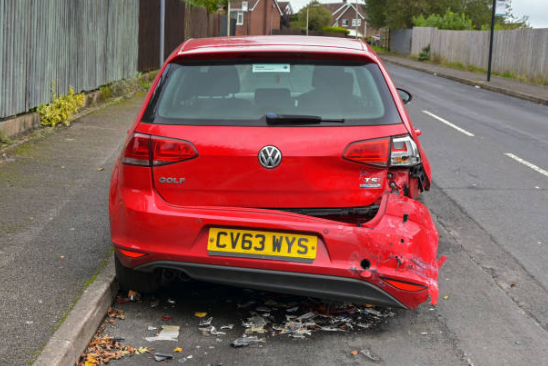

In [ ]:
import requests
from PIL import Image
import io

# Download the image
url = "https://raw.githubusercontent.com/RobertoBarrosoLuque/scout-claims/main/images/back_rhs_damage.png"
response = requests.get(url)

# Or load directly into PIL Image
image = Image.open(io.BytesIO(response.content))
image  # Display in notebook

Then we will create a helper function to convert the image to the appropriate format for the LLM

In [ ]:
def pil_to_base64_dict(pil_image):
    """Convert PIL image to the format expected by analyze_damage_image"""
    if pil_image is None:
        return None

    buffered = io.BytesIO()
    if pil_image.mode != "RGB":
        pil_image = pil_image.convert("RGB")

    pil_image.save(buffered, format="JPEG")
    img_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

    return {"image": pil_image, "path": "uploaded_image.jpg", "base64": img_base64}

In [ ]:
class IncidentAnalysis(BaseModel):
    description: str
    location: Literal["front-left", "front-right", "back-left", "back-right"]
    severity: Literal["minor", "moderate", "major"]
    license_plate: str

image_for_llm = pil_to_base64_dict(image)

llm = LLM(
    model="accounts/fireworks/models/llama4-maverick-instruct-basic",
    deployment_type="serverless",
    api_key=FIREWORKS_API_KEY
)

In [ ]:
response = llm.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_for_llm['base64']}"
                    },
                },
                {"type": "text", "text": "Describe the car damage in this image and extract all usefull information"},
            ],
        }
    ],
    response_format={
        "type": "json_object",
        "schema": IncidentAnalysis.model_json_schema(),
    }
    )

result = json.loads(response.choices[0].message.content)

for key, val in result.items():
    print(f"{key}: {val}")

description: The image shows a red Volkswagen Golf car parked on the side of a road, with significant damage to its rear right side. The license plate reads 'CV63 WYS' in yellow letters on a black background. The car's bumper is severely damaged, with a large dent and scratches visible. The surrounding area is littered with debris from the collision.
location: front-left
severity: major
license_plate: CV63 WYS


## With requests

In [ ]:
# Prepare payload for image analysis
payload = {
    "messages": [
        {
            "role": "user",
            "content": [
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{image_for_llm['base64']}"
                    },
                },
                {"type": "text", "text": "Describe the car damage in this image and extract all usefull information"},
            ],
        }
    ],
    "response_format": {
        "type": "json_object",
        "schema": IncidentAnalysis.model_json_schema(),
    }
}

# Make the API call
response = make_api_call(payload)

# Parse and display results
result = json.loads(response['choices'][0]['message']['content'])

for key, val in result.items():
    print(f"{key}: {val}")

description: The car displays significant rear-end damage, with substantial crumpling evident on the bumper and rear quarter panels. The license plate reads 'CV63 WYS' and the make of the car is Volkswagen Golf.
location: front-left
severity: moderate
license_plate: CV63 WYS


Above we used both a VLM and structured outputs to extract the description, location, severity as well as the license-plate based on a car crash picture